# Análise exploratória



## Objetivo

O principal objetivo dessa análise é explorar e descobrir padrões, anomalias e relações entre variáveis antes de aplicar técnicas de modelagem mais avançadas. O conjunto de dados carrega informações sobre uma série de aplicativos disponíveis no Google Play Store

# Sobre os dados

Colunas do dataframe:

* App (nome dos aplicativos)
* Rating (nota no google play store)
* Size_Megabytes (tamanho do aplicativo)
* Installs	(número de vezes que foi baixado)
* Type	(se ele é pago ou gratuito)
* Price	(preço do app em dolares)
* Content Rating (classificação do conteúdo)
* Last Updated (Última vez que o app foi atualizado)
* Current Ver (versão mais recente do aplicativo)
* Android Ver (Compatibilidade com a versão do android)
* Genres_1 (Gênero do aplicativo)
* Genres_description (Subgênero do aplicativo)

# Perguntas motivadoras

* Como as variáveis se relacionam?
* As avaliações são um critério relevante para um aplicativo ser instalado por usuários?
* Qual classificação etária representa a maior parte dos downloads
* Qual gênero de aplicativo mais popular?
* Qual faixa de preço os aplicativos mais populares se encontram?

# Imports

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data path

In [15]:
path = '../processed data/google_play_apps.csv'

# Data view

In [16]:
df = pd.read_csv(path)
df

,App,Rating,Size_Megabytes,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genres_1,Genres_description
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,19.0,"10,000+",Free,0.0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up,Art & Design,No description
1,Coloring book moana,3.9,14.0,"500,000+",Free,0.0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,8.7,"5,000,000+",Free,0.0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up,Art & Design,No description
3,Sketch - Draw & Paint,4.5,25.0,"50,000,000+",Free,0.0,Teen,"June 8, 2018",Varies with device,4.2 and up,Art & Design,No description
4,Pixel Draw - Number Art Coloring Book,4.3,2.8,"100,000+",Free,0.0,Everyone,"June 20, 2018",1.1,4.4 and up,Art & Design,Creativity
...,...,...,...,...,...,...,...,...,...,...,...,...
8217,FR Calculator,4.0,2.6,500+,Free,0.0,Everyone,"June 18, 2017",1.0.0,4.1 and up,Education,No description
8218,Sya9a Maroc - FR,4.5,53.0,"5,000+",Free,0.0,Everyone,"July 25, 2017",1.48,4.1 and up,Education,No description
8219,Fr. Mike Schmitz Audio Teachings,5.0,3.6,100+,Free,0.0,Everyone,"July 6, 2018",1.0,4.1 and up,Education,No description
8220,The SCP Foundation DB fr nn5n,4.5,Not informed,"1,000+",Free,0.0,Mature 17+,"January 19, 2015",Varies with device,Varies with device,Books,No description


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8222 entries, 0 to 8221
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   App                 8222 non-null   object 
 1   Rating              8222 non-null   float64
 2   Size_Megabytes      8222 non-null   object 
 3   Installs            8222 non-null   object 
 4   Type                8222 non-null   object 
 5   Price               8222 non-null   float64
 6   Content Rating      8222 non-null   object 
 7   Last Updated        8222 non-null   object 
 8   Current Ver         8222 non-null   object 
 9   Android Ver         8222 non-null   object 
 10  Genres_1            8222 non-null   object 
 11  Genres_description  8222 non-null   object 
dtypes: float64(2), object(10)
memory usage: 770.9+ KB


In [20]:
df.describe()

,Rating,Price
count,8222.000000,8222.000000
mean,4.174751,0.320379
std,0.535773,1.926552
min,1.000000,0.000000
25%,4.000000,0.000000
50%,4.300000,0.000000
75%,4.500000,0.000000
max,5.000000,79.990000


# Respondendo a perguntas motivadoras

## Como as variáveis se relacionam

Aqui vamos tentar identificar correlações entre nossas variáveis

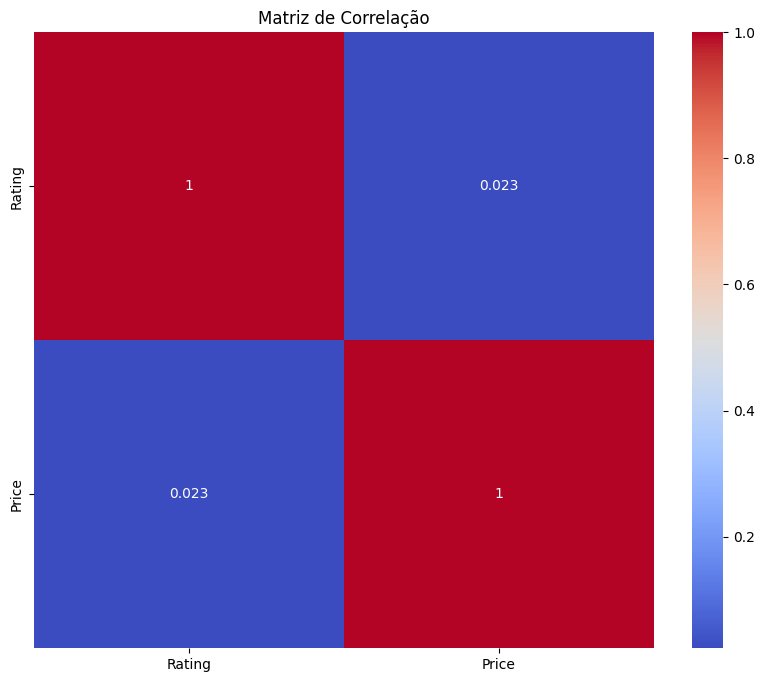

In [27]:
# Matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


In [22]:
valores_numericos = df.select_dtypes(include=['float64'])

In [23]:
valores_numericos.corr()

,Rating,Price
Rating,1.000000,0.023001
Price,0.023001,1.000000


## As avaliações são um critério relevante para um aplicativo ser instalado por usuários?

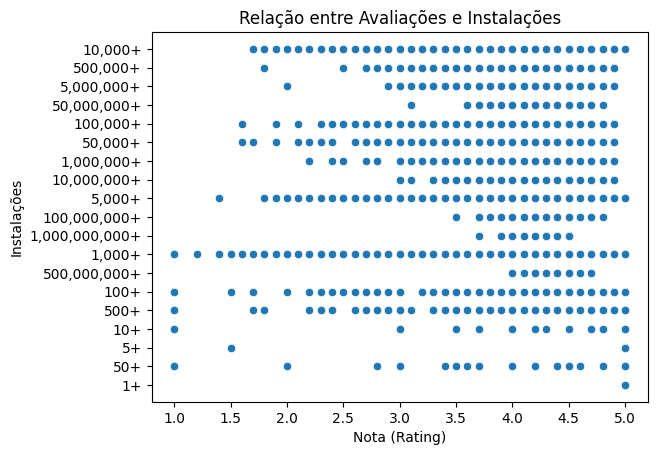

In [28]:
# Gráfico de dispersão
sns.scatterplot(data=df, x='Rating', y='Installs')
plt.title('Relação entre Avaliações e Instalações')
plt.xlabel('Nota (Rating)')
plt.ylabel('Instalações')
plt.show()


## Qual classificação etária representa a maior parte dos downloads?

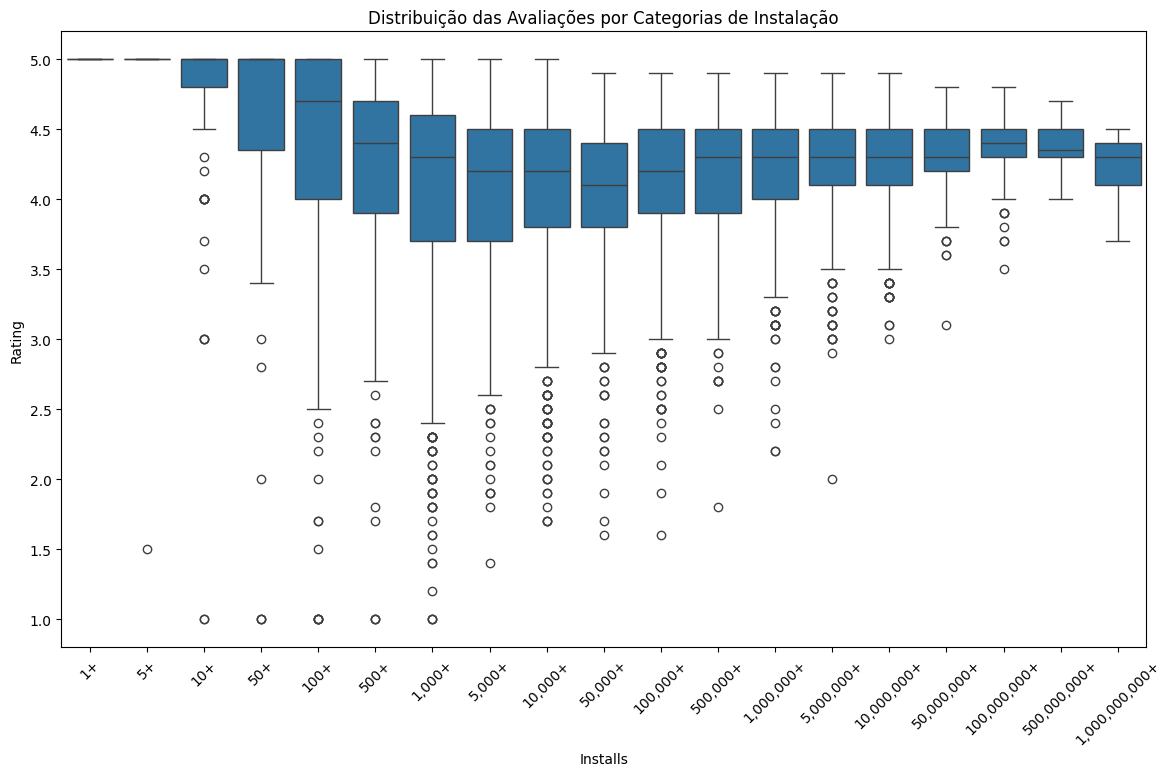

In [30]:
# Ordenar a coluna 'Installs' para melhor visualização
ordem_installs = ['1+', '5+', '10+', '50+', '100+', '500+', '1,000+', '5,000+', '10,000+', 
                  '50,000+', '100,000+', '500,000+', '1,000,000+', '5,000,000+', '10,000,000+', 
                  '50,000,000+', '100,000,000+', '500,000,000+', '1,000,000,000+']

plt.figure(figsize=(14, 8))
sns.boxplot(x='Installs', y='Rating', data=df, order=ordem_installs)
plt.xticks(rotation=45)
plt.title('Distribuição das Avaliações por Categorias de Instalação')
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.show()

## Qual gênero de aplicativo é mais popular?

In [41]:
# Contar o total de aplicativos por faixa de download e ordenar de forma decrescente
apps_by_installs = df['Installs'].value_counts().reset_index()
apps_by_installs.columns = ['Installs', 'Total_Apps']
apps_by_installs = apps_by_installs.sort_values(by='Total_Apps', ascending=True)

# Gráfico de barras horizontais
fig1 = px.bar(apps_by_installs, 
              x='Total_Apps', 
              y='Installs', 
              orientation='h',
              title='Total de Aplicativos por Faixa de Download',
              labels={'Total_Apps': 'Total de Aplicativos', 'Installs': 'Faixa de Downloads'})

fig1.show()


# Contar o total de aplicativos por gênero
apps_by_genre = df['Genres_1'].value_counts().reset_index()
apps_by_genre.columns = ['Genre', 'Total_Apps']
apps_by_genre = apps_by_genre.sort_values(by='Total_Apps', ascending=True)

# Gráfico de barras verticais
fig2 = px.bar(apps_by_genre, 
              x='Total_Apps', 
              y='Genre', 
              title='Total de Aplicativos por Gênero',
              labels={'Genre': 'Gênero', 'Total_Apps': 'Total de Aplicativos'})

fig2.update_xaxes(tickangle=45)
fig2.show()


## Qual faixa de preço os aplicativos mais populares se encontram?

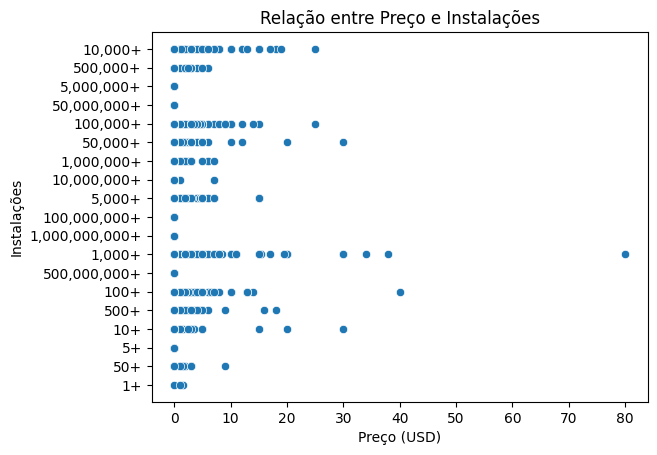

In [36]:
# Scatter plot para preço vs instalações
sns.scatterplot(data=df, x='Price', y='Installs')
plt.title('Relação entre Preço e Instalações')
plt.xlabel('Preço (USD)')
plt.ylabel('Instalações')
plt.show()
